In [ ]:
import cv2
!pip install giotto-tda
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gtda.images  
import gtda.homology
import gtda.diagrams

     |████████████████████████████████| 1.5MB 4.2MB/s 
     |████████████████████████████████| 399kB 22.7MB/s 
     |████████████████████████████████| 3.2MB 22.1MB/s 
     |████████████████████████████████| 22.2MB 1.4MB/s 
     |████████████████████████████████| 13.2MB 40.1MB/s 
     |████████████████████████████████| 25.9MB 73.0MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [ ]:
 img_dr = plt.imread("0"+ '2' + "_dr.JPG")
 img_h = plt.imread("0"+ '1' + "_h.jpg")
 img_g = plt.imread("0"+ '1' + "_g.jpg")

In [ ]:
def plot_image(Q):
    plt.matshow(Q);
    plt.colorbar()

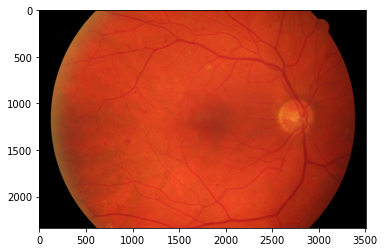

In [ ]:
plt.imshow(img_dr)

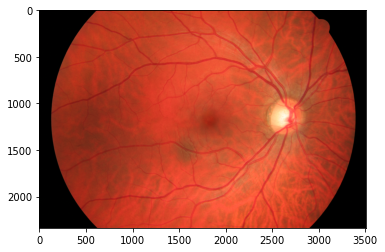

In [ ]:
plt.imshow(img_h)

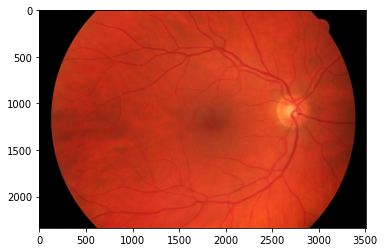

In [ ]:
plt.imshow(img_g)

In [ ]:
coeff = [0.299,0.587,0.114]
#coeff = [0,1,0]
def get_gs(img, show = False):
  gs = 0.299*img[:,:,0] + 0.587*img[:,:,1] + 0.114*img[:,:,2]
  if show:
    plt.imshow(gs, cmap = 'gray')
    plt.colorbar
  return gs

In [ ]:
 def get_images_stream(stri):
  images_1 = np.zeros((15, 2336, 3504))
  images_2 = np.zeros((15, 2336, 3504))
  images_3 = np.zeros((15, 2336, 3504))
  for i in range(1,10):
    img = plt.imread("0"+ str(i) + stri)
    images_1[i-1,:,:] = cv2.equalizeHist(np.uint8(cv2.normalize(img[:,:,0], None, 0, 255, cv2.NORM_MINMAX)))
    images_2[i-1,:,:] = cv2.equalizeHist(np.uint8(cv2.normalize(img[:,:,1], None, 0, 255, cv2.NORM_MINMAX)))
    images_3[i-1,:,:] = cv2.equalizeHist(np.uint8(cv2.normalize(img[:,:,2], None, 0, 255, cv2.NORM_MINMAX)))
  for i in range(10,16):
    img = plt.imread(str(i) + stri)
    images_1[i-1,:,:] = cv2.equalizeHist(np.uint8(cv2.normalize(img[:,:,0], None, 0, 255, cv2.NORM_MINMAX)))
    images_2[i-1,:,:] = cv2.equalizeHist(np.uint8(cv2.normalize(img[:,:,1], None, 0, 255, cv2.NORM_MINMAX)))
    images_3[i-1,:,:] = cv2.equalizeHist(np.uint8(cv2.normalize(img[:,:,2], None, 0, 255, cv2.NORM_MINMAX)))
  return [images_1,images_2,images_3]

In [ ]:
stri = "_h.jpg"

In [ ]:
images= np.zeros((15, 2336, 3504))
for i in range(1,10):
  images[i-1] = get_gs(plt.imread("0"+ str(i) + stri)) 
  #img1= np.uint8(cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX))
  #images[i-1] = cv2.equalizeHist(img1)
for i in range(10,16):
  images[i-1] = get_gs(plt.imread(str(i) + stri ))
  #img1= np.uint8(cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX))
  #images[i-1] = cv2.equalizeHist(img1)

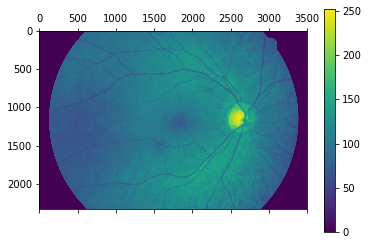

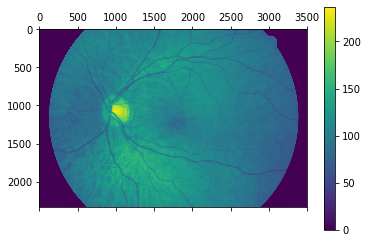

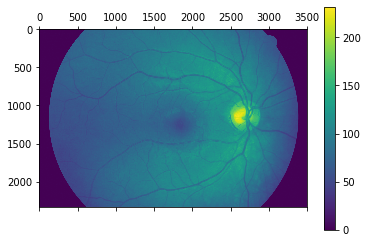

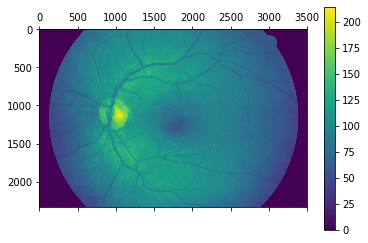

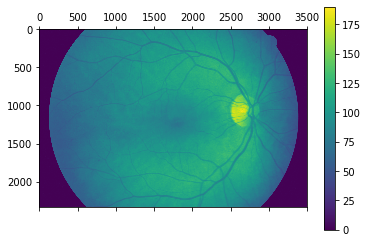

In [ ]:
for i in range(0,5):
  #plt.imshow(images_h[i], cmap = 'gray')
  plt.matshow(images[i]);
  plt.colorbar()

In [ ]:
data_dim = 15
image_dim = (2336,3504)

In [ ]:
density_array = [2,4,6]
def density_data_fn(images, d_array = density_array, ent=True, land=False, 
                    heat=False, wdist=False, betti=False):
    n_col = (2*ent + 2*land + 2*heat + 2*wdist +2*betti)*np.shape(d_array)[0]
    density_data = np.zeros((np.shape(images)[0],n_col))
    m = 0 #current column counter
    for i in range(0, np.shape(d_array)[0]):
        density_fil_images = gtda.images.DensityFiltration(radius = d_array[i]).fit_transform(images)
        cubical_diagrams = gtda.homology.CubicalPersistence().fit_transform(density_fil_images)
        if ent == True:
            density_data[:,m:m+2] = gtda.diagrams.PersistenceEntropy().fit_transform(cubical_diagrams)
            m = m + 2
        if land == True:
            density_data[:,m:m+2] = gtda.diagrams.Amplitude(metric_params={"n_layers":2} , metric ='landscape', 
                                                           order = None).fit_transform(cubical_diagrams)
            m = m+2
        if heat == True:
            density_data[:,m:m+2]= gtda.diagrams.Amplitude(metric = 'heat', order = None).fit_transform(cubical_diagrams)
            m = m + 2
        if betti == True:
            density_data[:,m:m+2] = gtda.diagrams.Amplitude(metric = 'betti', order = None).fit_transform(cubical_diagrams)
            m = m + 2
        if wdist == True:
            density_data[:,m:m+2] = gtda.diagrams.Amplitude(metric = 'wasserstein', order = None).fit_transform(cubical_diagrams)
            m = m + 2
    print("done") 
    return density_data

In [ ]:
def grayscale_data_fn(images, ent=True, land=False, 
                      heat=False, wdist=False, betti=False):
    n_col = (2*ent + 2*land + 2*heat + 2*wdist +2*betti)
    grayscale_data = np.zeros((np.shape(images)[0],n_col))
    cubical_diagrams = gtda.homology.CubicalPersistence().fit_transform(images)
    m=0
    if ent == True:
        grayscale_data[:,m:m+2] = gtda.diagrams.PersistenceEntropy().fit_transform(cubical_diagrams)
        m = m + 2
    if land == True:
        grayscale_data[:,m:m+2] = gtda.diagrams.Amplitude(metric_params={"n_layers":2} , metric ='landscape', 
                                                        order = None).fit_transform(cubical_diagrams)
        m = m + 2
    if heat == True:
        grayscale_data[:,m:m+2]= gtda.diagrams.Amplitude(metric = 'heat', order = None).fit_transform(cubical_diagrams)
        m = m + 2
    if betti == True:
        grayscale_data[:,m:m+2] = gtda.diagrams.Amplitude(metric = 'betti', order = None).fit_transform(cubical_diagrams)
        m = m + 2
    if wdist == True:
        grayscale_data[:,m:m+2] = gtda.diagrams.Amplitude(metric = 'wasserstein', order = None).fit_transform(cubical_diagrams)
        m = m + 2  
    print("done")          
    return grayscale_data

In [ ]:
def vr_data_fn(images, ent=True, land=False, 
               heat=False, wdist=False, betti=False):
    n_col = (2*ent + 2*land + 2*heat + 2*wdist +2*betti)
    vr_data = np.zeros((np.shape(images)[0],n_col))
    point_cloud_data = gtda.images.ImageToPointCloud().fit_transform(images)
    cubical_diagrams = gtda.homology.VietorisRipsPersistence().fit_transform(point_cloud_data)
    m=0
    if ent == True:
        vr_data[:,m:m+2] = gtda.diagrams.PersistenceEntropy().fit_transform(cubical_diagrams)
        m = m + 2
    if land == True:
        vr_data[:,m:m+2] = gtda.diagrams.Amplitude(metric_params={"n_layers":2}, metric ='landscape', 
                                                        order = None).fit_transform(cubical_diagrams)
        m = m + 2
    if heat == True:
        vr_data[:,m:m+2]= gtda.diagrams.Amplitude(metric = 'heat', order = None).fit_transform(cubical_diagrams)
        m = m + 2
    if betti == True:
        vr_data[:,m:m+2] = gtda.diagrams.Amplitude(metric = 'betti', order = None).fit_transform(cubical_diagrams)
        m = m + 2
    if wdist == True:
        vr_data[:,m:m+2] = gtda.diagrams.Amplitude(metric = 'wasserstein', order = None).fit_transform(cubical_diagrams)
        m = m + 2 
    print("done")           
    return vr_data

In [ ]:
grayscale_data = grayscale_data_fn(images, ent = False, wdist = True)

done


In [ ]:
#grayscale_data_1 = grayscale_data_fn(images[0:5], ent = False, land = True)

In [ ]:
#grayscale_data_2 = grayscale_data_fn(images[5:10], ent = False, land = True)

In [ ]:
#grayscale_data_3 = grayscale_data_fn(images[10:], ent = False, land = True)

In [ ]:
#grayscale_data = np.concatenate((grayscale_data_1,grayscale_data_2, grayscale_data_3))

In [ ]:
np.shape(grayscale_data)

(15, 2)

In [ ]:
pd.DataFrame(grayscale_data).to_csv('grayscale_h_wdist.csv')

In [ ]:
!zip grayscale_wdist.zip *.csv

  adding: grayscale_dr_wdist.csv (deflated 47%)
  adding: grayscale_g_wdist.csv (deflated 47%)
  adding: grayscale_h_wdist.csv (deflated 47%)


In [ ]:
!mv grayscale_wdist.zip "/content/drive/My Drive"